T1
>linear regression of house price

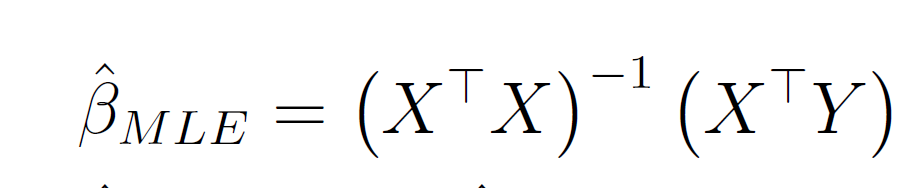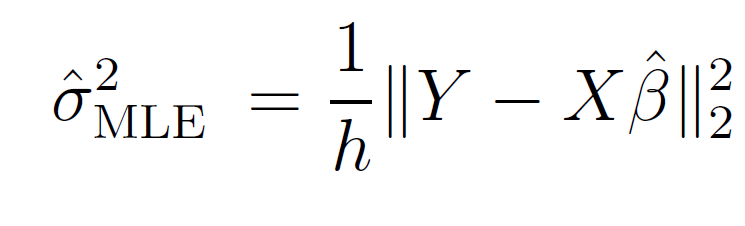

In [2]:
import pandas as pd
import numpy as np

class linear_regression:  # Define linear_regression as a class
    def __init__(self, problem, filepath):
        self.selected_indices = problem[1]
        self.X = None
        self.Y = None
        self.beta = None
        self.sigma_2 = None
        self.read_csv_as_vectors(filepath)  # Call methods using self.

    def read_csv_as_vectors(self, filepath):
        try:
            df = pd.read_csv('data.csv')
            self.X = df.iloc[:, self.selected_indices]
            self.Y = df.iloc[:, [0]] # Assuming the first column is the target variable 'y'
            # return self.y, self.X
        except FileNotFoundError:
            print(f"Error: File not found at 'data.csv'")
            # return None

    def regression_beta(self):
        X = np.concatenate((np.ones((self.X.shape[0], 1)), self.X), axis=1)
        Y = self.Y
        self.beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        return self.beta

    def regression_sigma(self):
      """
      \sigma^2 = ||Y - X\beta||^2 / n
      """
      X = np.concatenate((np.ones((self.X.shape[0], 1)), self.X), axis=1)
      Y = self.Y
      self.sigma_2 = np.linalg.norm(Y - X.dot(self.beta))**2 / X.shape[0]
      return self.sigma_2


# Example usage (assuming your file is named 'data.csv' and is in the current directory)
filepath = 'data.csv'
problem = [3, [2, 5]]

# get the MLE of Y and X
model = linear_regression(problem, filepath) # Create an instance of the class
beta = model.regression_beta()
sigma_2 = model.regression_sigma()
print("Belta is:")
print(beta)
print("Sigma^2 is:")
print(sigma_2)

Belta is:
[[6.37259161e+04]
 [4.42236071e+00]
 [7.78881323e+04]]
Sigma^2 is:
5178229170.753682


T2
>interval estimation

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
X = [2.2,2.5,3.0,2.7,3.1,2.7,2.3,2.8,2.4,2.8,2.6,2.6,3.1,3.0,2.5, ]
sum = 0
print(len(X))
for x in X:
  sum = sum + x
Xbar = sum / len(X)
sigma = 0.5
# Z_alpha return the p = 1 - 0.5 * alpha value of N(0,1)， normal distribution
# eg: alpha = 0.05, Z_alpha = \phi_(1 - 0.5 * 0.05) = \phi_0.975 = 1.96
alpha = 0.01
def normal_cdf_inverse(p):
  """返回标准正态分布的 CDF 的逆函数。

  Args:
    p: CDF 的值，介于 0 和 1 之间。

  Returns:
    对应于给定 CDF 值的分位数。
  """
  return stats.norm.ppf(p)

Z_alpha = normal_cdf_inverse(1 - alpha / 2)

p = 0.975
quantile = normal_cdf_inverse(p)
print(quantile)  # 输出：1.959963984540054
print(Z_alpha)
A = Z_alpha * sigma / np.sqrt(len(X))
X1 = Xbar - A
X2 = Xbar + A
print(X1)
print(X2)
print(Xbar)

15
1.959963984540054
2.5758293035489004
2.354128533489402
3.0192047998439318
2.686666666666667


## T7
>construction of intervals

In [27]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('data.csv')

# Extract the SalePrice for houses with central air conditioning (Central Air = 1)
X = data[data['Ce0tral_Air'] == 1]['SalePrice']

# Extract the SalePrice for houses without central air conditioning (Central Air = 0)
Y = data[data['Ce0tral_Air'] == 0]['SalePrice']

# Calculate the mean and variance of SalePrice for houses with central air conditioning
mean_X = X.mean()
variance_X = X.var()
n = len(X)
# Calculate the mean and variance of SalePrice for houses without central air conditioning
mean_Y = Y.mean()
variance_Y = Y.var()
m = len(Y)
# calculate Z_alpha
alpha = 0.05
Z_alpha = normal_cdf_inverse(1 - alpha / 2)

# Print the results
print('Mean SalePrice for houses with central air conditioning:', mean_X)
print('Variance of SalePrice for houses with central air conditioning:', variance_X)
print('Mean SalePrice for houses without central air conditioning:', mean_Y)
print('Variance of SalePrice for houses without central air conditioning:', variance_Y)

# for the case sigma is known
sigma = 79400
LHS1 =  mean_X - mean_Y - Z_alpha * sigma * np.sqrt(1 / n + 1 / m)
RHS1 =  mean_X - mean_Y + Z_alpha * sigma * np.sqrt(1 / n + 1 / m)
print("sigma is known")
print(LHS1)
print(RHS1)

# calculate the 95% confidence interval of X and Y
LHS =  mean_X - mean_Y - Z_alpha * np.sqrt(variance_X / n + variance_Y / m)
RHS =  mean_X - mean_Y + Z_alpha * np.sqrt(variance_X / n + variance_Y / m)
print("sigma is UNknown")
print(LHS)
print(RHS)

Mean SalePrice for houses with central air conditioning: 186246.33559322034
Variance of SalePrice for houses with central air conditioning: 6206263704.418506
Mean SalePrice for houses without central air conditioning: 101545.58536585367
Variance of SalePrice for houses without central air conditioning: 1021938363.097161
sigma is known
70095.51973904426
99305.98071568909
sigma is UNknown
77766.77591842445
91634.7245363089


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


>without knowing sigma
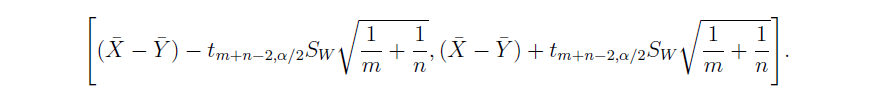

In [16]:
import scipy.stats as stats
import numpy as np

def confidence_interval_mu1_mu2(X, Y, confidence_level=0.95):
  """构建 μ₁ - μ₂ 的置信区间。

  Args:
    X: 来自 N(μ₁, σ²) 的随机样本。
    Y: 来自 N(μ₂, σ²) 的随机样本。
    confidence_level: 置信水平，介于 0 和 1 之间（默认为 0.95）。

  Returns:
    μ₁ - μ₂ 的置信区间，表示为一个元组 (lower_bound, upper_bound)。
  """
  m = len(X)
  n = len(Y)
  X_bar = np.mean(X)
  Y_bar = np.mean(Y)
  SX_squared = np.var(X, ddof=1)  # 使用 ddof=1 获取样本方差
  SY_squared = np.var(Y, ddof=1)  # 使用 ddof=1 获取样本方差
  SW = np.sqrt(((m - 1) * SX_squared + (n - 1) * SY_squared) / (m + n - 2))
  alpha = 1 - confidence_level
  t_critical_l = stats.t.ppf(alpha / 2, m + n - 2)
  print(t_critical_l)
  t_critical_r = stats.t.ppf(1 - alpha / 2, m + n - 2)
  print(t_critical_r)
  margin_of_error_l = t_critical_l * SW * np.sqrt(1/m + 1/n)
  margin_of_error_r = t_critical_r * SW * np.sqrt(1/m + 1/n)

  lower_bound = (X_bar - Y_bar) + margin_of_error_l
  upper_bound = (X_bar - Y_bar) + margin_of_error_r
  return lower_bound, upper_bound

confidence_level = 0.95
lower_bound, upper_bound = confidence_interval_mu1_mu2(X, Y, confidence_level)
print(f"μ₁ - μ₂ 的置信区间为 ({lower_bound}, {upper_bound})")

-1.9614514787235884
1.9614514787235884
μ₁ - μ₂ 的置信区间为 (70669.24485136988, 98732.25560336348)


In [17]:
def confidence_interval_sigma(X, Y, confidence_level=0.95):
  """构建 μ₁ - μ₂ 的置信区间。

  Args:
    X: 来自 N(μ₁, σ²) 的随机样本。
    Y: 来自 N(μ₂, σ²) 的随机样本。
    confidence_level: 置信水平，介于 0 和 1 之间（默认为 0.95）。

  Returns:
    sigma_1 / sigma_2 的置信区间，表示为一个元组 (lower_bound, upper_bound)。
  """
  m = len(X)
  n = len(Y)
  X_bar = np.mean(X)
  Y_bar = np.mean(Y)
  SX_squared = np.var(X, ddof=1)  # 使用 ddof=1 获取样本方差
  SY_squared = np.var(Y, ddof=1)  # 使用 ddof=1 获取样本方差

  alpha = 1 - confidence_level

  # calculate F_{n - 1, m - 1}(1 - alpha / 2)
  # calculate F_{n - 1, m - 1}(alpha / 2)
  F_lower = stats.f.ppf(alpha / 2, n - 1, m - 1)
  F_upper = stats.f.ppf(1 - alpha / 2, n - 1, m - 1)

  # lower_bound = SX_sq / SY_sq * (F_low)^0.5

  lower_bound = (SX_squared / SY_squared) * (F_lower)**0.5
  upper_bound = (SX_squared / SY_squared) * (F_upper)**0.5
  return lower_bound, upper_bound

confidence_level = 0.95
lower_bound, upper_bound = confidence_interval_sigma(X, Y, confidence_level)
print(f"sigma的比值的95%置信区间为({lower_bound}, {upper_bound})")

sigma的比值的95%置信区间为(5.288003652649328, 6.872813395628835)


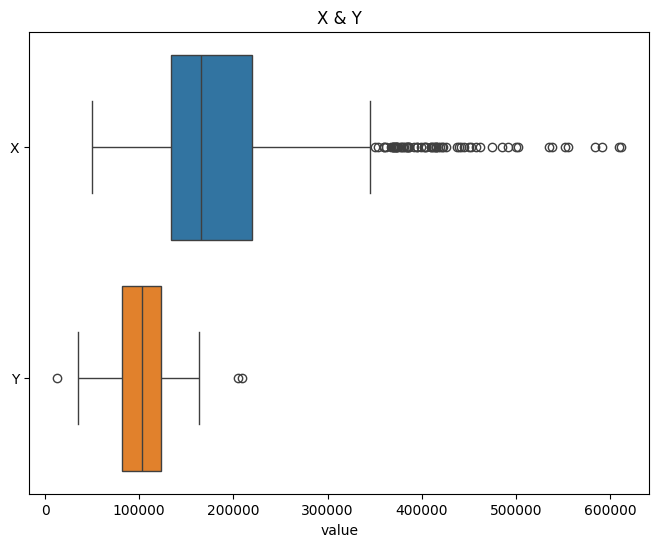

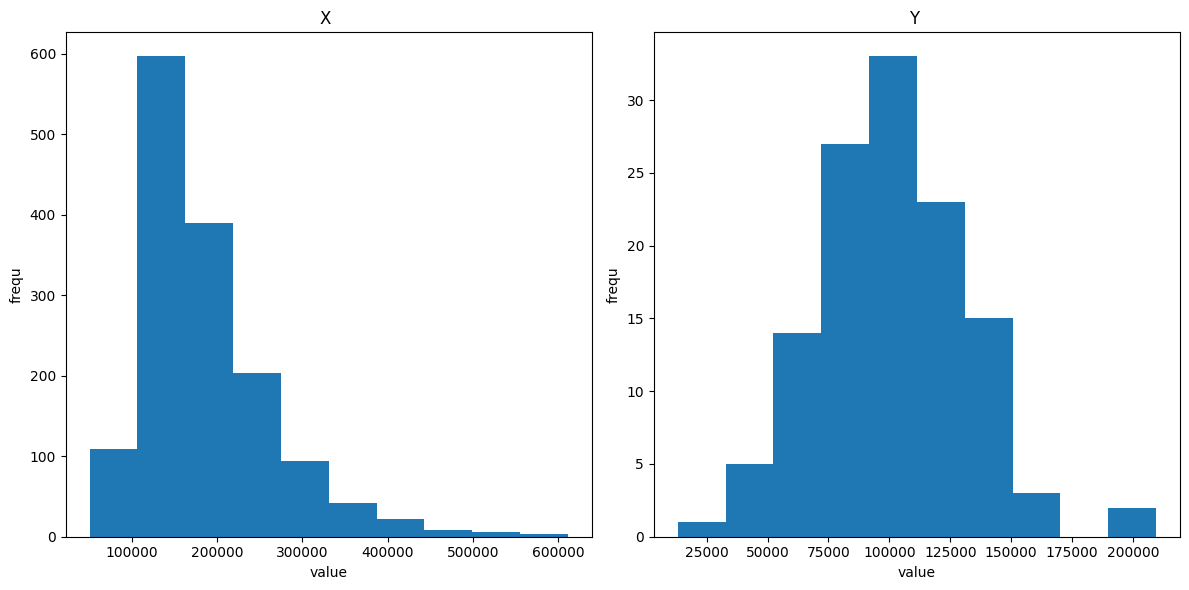

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 创建一个包含 X 和 Y 数据的 Pandas DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# 绘制 X 和 Y 的盒子图
plt.figure(figsize=(8, 6))  # 设置图像大小
sns.boxplot(data=data, orient="h")  # orient="h" 表示水平绘制盒子图
plt.title("X & Y")
plt.xlabel("value")
plt.show()

# 绘制直方图
plt.figure(figsize=(12, 6))  # 设置图像大小
plt.subplot(1, 2, 1)  # 创建子图，1 行 2 列，当前是第一个子图
plt.hist(X, bins=10)  # 绘制 X 的直方图
plt.title("X ")
plt.xlabel("value")
plt.ylabel("frequ")

plt.subplot(1, 2, 2)  # 创建子图，1 行 2 列，当前是第二个子图
plt.hist(Y, bins=10)  # 绘制 Y 的直方图
plt.title("Y ")
plt.xlabel("value")
plt.ylabel("frequ")

plt.tight_layout()  # 调整子图布局，避免重叠
plt.show()



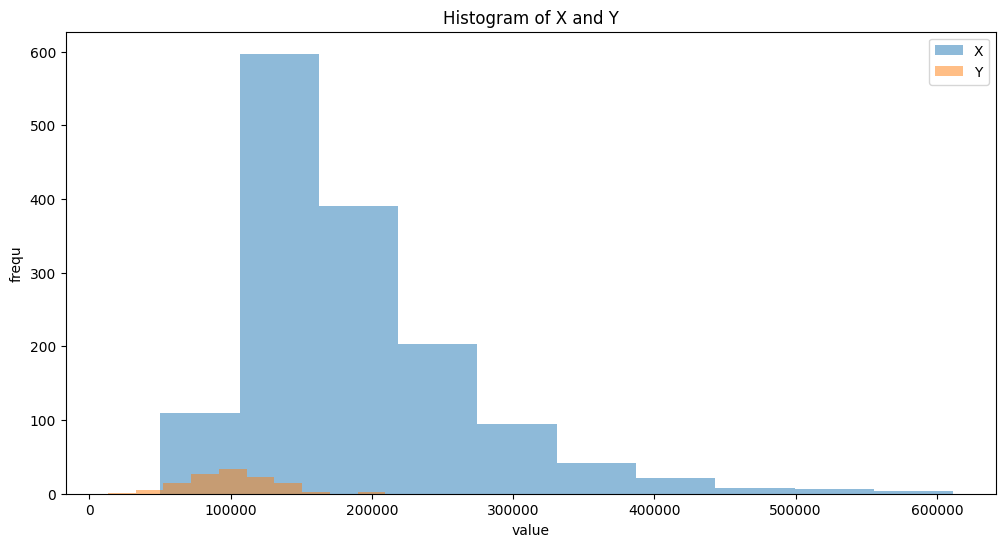

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming X and Y are your data

# Create a single figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first histogram (X)
ax.hist(X, bins=10, alpha=0.5, label='X')

# Plot the second histogram (Y) on the same axes
ax.hist(Y, bins=10, alpha=0.5, label='Y')

# Set title and labels
ax.set_title("Histogram of X and Y")
ax.set_xlabel("value")
ax.set_ylabel("frequ")

# Add a legend to distinguish the histograms
ax.legend(loc='upper right')

# Display the figure
plt.show()

In [28]:
import numpy as np
import scipy.stats as stats
m = len(X)
n = len(Y)

# Sample means
Xbar = np.mean(X)
Ybar = np.mean(Y)

# Sample standard deviations
SX = np.std(X, ddof=1)  # ddof=1 for unbiased estimator
SY = np.std(Y, ddof=1)

# Confidence level (e.g., 95%)
gamma = 0.95

# Degrees of freedom
df_X = m - 1
df_Y = n - 1

# Critical t-values
t_X = stats.t.ppf(1 - (1 - gamma) / 2, df_X)
t_Y = stats.t.ppf(1 - (1 - gamma) / 2, df_Y)

# Confidence intervals for mu_1 and mu_2
CI_X = (Xbar - t_X * SX / np.sqrt(m), Xbar + t_X * SX / np.sqrt(m))
CI_Y = (Ybar - t_Y * SY / np.sqrt(n), Ybar + t_Y * SY / np.sqrt(n))

# Confidence region (rectangle)
print("Confidence Region for (mu_1, mu_2):")
print(f"  mu_1: {CI_X}")
print(f"  mu_2: {CI_Y}")

Confidence Region for (mu_1, mu_2):
  mu_1: (182222.6507916516, 190270.02039478908)
  mu_2: (95839.51380273043, 107251.6569289769)


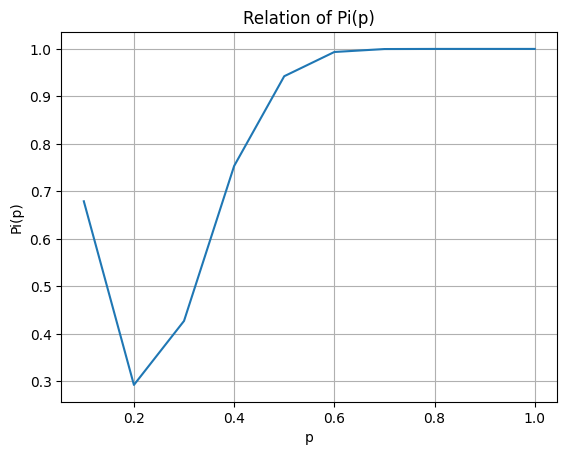

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb  # Import comb for binomial coefficient calculation

# Define the function Pi(p)
def Pi_p(p):
  """
  Calculates Pi(p) for a given value of p.

  Args:
    p: The probability of success.

  Returns:
    The value of Pi(p).
  """

  sum_term = 0
  for i in range(3, 7):
    sum_term += comb(20, i) * (p**i) * ((1 - p)**(20 - i))  # Using comb for C(N, K)

  result = 1 - sum_term

  return result

# Define the range of p values
p_values = np.arange(0.1, 1.1, 0.1)

# Calculate Pi(p) for each value of p
Pi_values = [Pi_p(p) for p in p_values]

# Plot the results
plt.plot(p_values, Pi_values)
plt.xlabel('p')
plt.ylabel('Pi(p)')
plt.title('Relation of Pi(p)')
plt.grid(True)
plt.show()

In [2]:
import math

result = math.log(9.5) / math.log(1.5)
print(result)  # 输出：7.261859507142915

5.5523687577228635
